In [1]:
#importando las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Cargando los datos 
data_game= pd.read_csv('games.csv')
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#renombrando columnas 
columnas=data_game.columns
columnas_minuscula=[]
for s in columnas: 
    columnas_minuscula.append(s.lower())
data_game.columns=columnas_minuscula

## Conversion del tipo de dato 

Comenzamos por la conversion del tipo de dato de algunas columnas. 
En esta primera parte evidenciaremos el porque del cambio de dato.

In [4]:
print(data_game.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [5]:
#analizando la columna 'user_score' 
print(data_game['user_score'].value_counts())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


Como sabemos 'user_score' es el puntaje que le colocan los usuarios a un determinado juego y como este es un numero de tipo flotante es recomendable cambiar el tipo de dato object a flotante. Pero antes observamos que existe una calificacion denotada como 'TBD' ('to be determined'). El cambio de dato no se pude efectuar ya que este es un string por lo que cambiaremos esta calificacion como 999. Como las calificaciones van del 1 al 10, '999' nos indica que no se ha podido determinar aún la calificación. 

In [6]:
#Cambiamos 'tbd' a 999
data_game.loc[data_game['user_score']=='tbd','user_score']=999 
#Cambio en el tipo de dato 
data_game['user_score']=data_game['user_score'].astype('float')

In [7]:
#Analizando la columna 'rating' 
print(data_game['rating'].value_counts())
print('la cantidad de valores ausentes: ',data_game['rating'].isna().sum())

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64
la cantidad de valores ausentes:  6766


Completaremos estos valores ausentes como 'no rating' (No clasificado). Como ultimo paso convertiremos el tipo de dato a categorico.

In [8]:
data_game['rating'].fillna('no rating',inplace=True)
#Cambiando el tipo de dato 
data_game['rating']=data_game['rating'].astype('category')

In [9]:
print(data_game['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Como vemos existe un numero limitado de consolas por lo que seria recomendable cambiar a tipo de dato category

In [10]:
#Cambio de tipo de dato category
data_game['platform']=data_game['platform'].astype('category')

## Tratamiento de duplicados 

In [11]:
duplicados=data_game.duplicated().sum()
print('la cantidad de filas totalmente duplicadas: ',duplicados)

la cantidad de filas totalmente duplicadas:  0


In [12]:
print(data_game['name'].duplicated().sum())

5155


In [13]:
print(data_game['name'].value_counts())

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64


In [14]:
print(data_game[data_game['name']=='Need for Speed: Most Wanted'].head(5))

                             name platform  year_of_release   genre  na_sales  \
253   Need for Speed: Most Wanted      PS2           2005.0  Racing      2.03   
523   Need for Speed: Most Wanted      PS3           2012.0  Racing      0.71   
1190  Need for Speed: Most Wanted     X360           2012.0  Racing      0.62   
1591  Need for Speed: Most Wanted     X360           2005.0  Racing      1.00   
1998  Need for Speed: Most Wanted       XB           2005.0  Racing      0.53   

      eu_sales  jp_sales  other_sales  critic_score  user_score     rating  
253       1.79      0.08         0.47          82.0         9.1          T  
523       1.46      0.06         0.58           NaN         NaN  no rating  
1190      0.78      0.01         0.15          83.0         8.5          T  
1591      0.13      0.02         0.10          83.0         8.5          T  
1998      0.46      0.00         0.05          83.0         8.8          T  


Nombres de juegos repetidos pero con cambios de plataforma, y con diferentes años de lanzamiento por lo que no hay de que preocuparse de estos duplicados. 

## Tratamiento de valores ausentes 

In [15]:
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16446 non-null  float64 
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       10014 non-null  float64 
 10  rating           16715 non-null  category
dtypes: category(2), float64(7), object(2)
memory usage: 1.2+ MB


### columna name 

In [16]:
print(data_game[data_game['name'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score     rating  
659           0.08           NaN         NaN  no rating  
14244         0.00           NaN         NaN  no rating  


Al no tener el nombre del juego y ser dos filas que no contiene esta informacion importante, lo mas conveniente seria eliminar estas filas. 

In [17]:
# eliminacion de filas con 'name' ausente 
data_game.dropna(subset=['name'],inplace=True)

### columna year_of_release

In [18]:
print('valores ausentes en la columna "year_of_release": ',data_game['year_of_release'].isna().sum())

valores ausentes en la columna "year_of_release":  269


Ya que representa una cantidad importante de datos, vamos a dejar estos valores como 0. Veremos mas adelante si es que en realidad afectan a nuestro analisis. Cabe recalcar que podriamos tambien eliminar estos datos o rellenarlos con la media pero tomaremos en consideración esta decision para más adelante. 

In [19]:
data_game=data_game.dropna(subset=['year_of_release'])
#cambio en el tipo de dato
data_game['year_of_release']= data_game['year_of_release'].astype('int')

### columna genre 

In [20]:
print('la cantidad de valores ausentes: ',data_game['genre'].isna().sum())

la cantidad de valores ausentes:  0


### columna critic_score

In [21]:
print('la cantidad de valores ausentes: ',data_game['critic_score'].isna().sum())

la cantidad de valores ausentes:  8461


La cantida de valores ausentes dentro de las critica es bastante por lo que eliminar estos datos puede llevarnos a tener errores en nuestro analisis por el momento se dejaran. 

### columna user_score 

In [22]:
print('la cantidad de valores ausentes: ',data_game['user_score'].isna().sum()) 

la cantidad de valores ausentes:  6605


### columna rating 

In [23]:
print('la cantidad de valores ausentes: ',data_game['rating'].isna().sum()) 

la cantidad de valores ausentes:  0


In [24]:
data_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  category
 2   year_of_release  16444 non-null  int64   
 3   genre            16444 non-null  object  
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score     7983 non-null   float64 
 9   user_score       9839 non-null   float64 
 10  rating           16444 non-null  category
dtypes: category(2), float64(6), int64(1), object(2)
memory usage: 1.3+ MB


## Enriquecimiento de datos 

En esta seccion nos enfocaremos a la creacion de nuevas columnas que nos permitiran mas adelante a tener un mejor analisis a posterior. 

In [25]:
#creacion de una columna que acumula el total de ventas 
data_game['total_sales']=data_game['na_sales']+data_game['eu_sales']+data_game['jp_sales']+data_game['other_sales']

## Analisis de datos 

In [26]:
# Cantidad de juegos lanzados cada año 
data_fitered=data_game.groupby('year_of_release').size().reset_index()
data_fitered= data_fitered.rename(columns={0:'juegos_lanzados'}).sort_values(by=['year_of_release'])

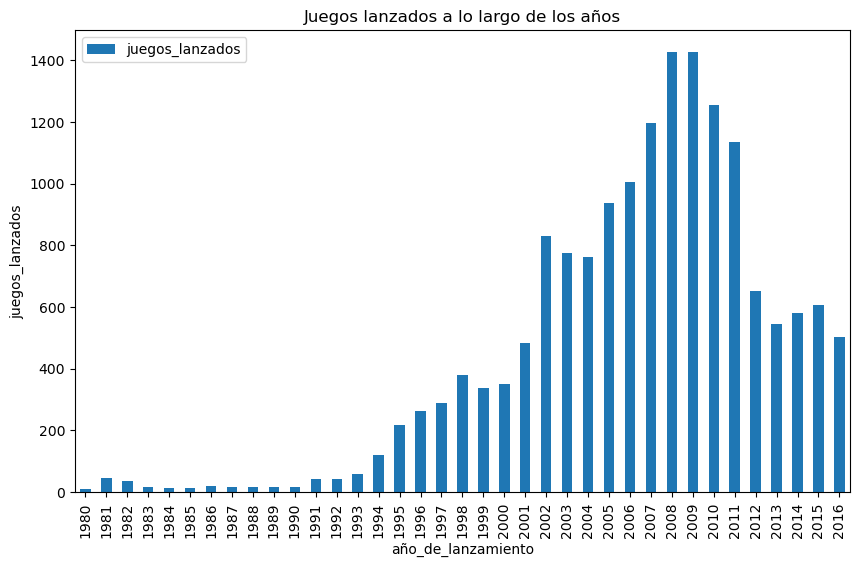

In [27]:
data_fitered.plot(kind='bar',
                  x='year_of_release',
                  y='juegos_lanzados',
                  xlabel='año_de_lanzamiento',
                  ylabel='juegos_lanzados',
                  title='Juegos lanzados a lo largo de los años',
                  figsize=(10,6),
)
plt.show()

Observamos que si no es que hasta los años 95 que comienza un crecimiento en esta industria y unas ventas significativas hasta llegar un pico en los años 2007 y 2008. 

### ¿Como ha variado las ventas de las distintas plataformas a lo largo de los años? 

Para esta seccion veremos el comportamiento de ventas de juegos de las distintas plataforma a lo largo de los años, como es que algunas consolas a pesar de tener altas ventas desaparecen con el tiempo, como es la ventas de las consolas mas actuales, etc. 

In [28]:
data_pivot= data_game.pivot_table(index=['platform','year_of_release'],values=['total_sales'], aggfunc=['sum']).reset_index()
print(data_pivot)

     platform year_of_release         sum
                              total_sales
0        2600            1980       11.38
1        2600            1981       35.68
2        2600            1982       28.88
3        2600            1983        5.84
4        2600            1984        0.27
...       ...             ...         ...
1142     XOne            2012        0.00
1143     XOne            2013       18.96
1144     XOne            2014       54.07
1145     XOne            2015       60.14
1146     XOne            2016       26.15

[1147 rows x 3 columns]


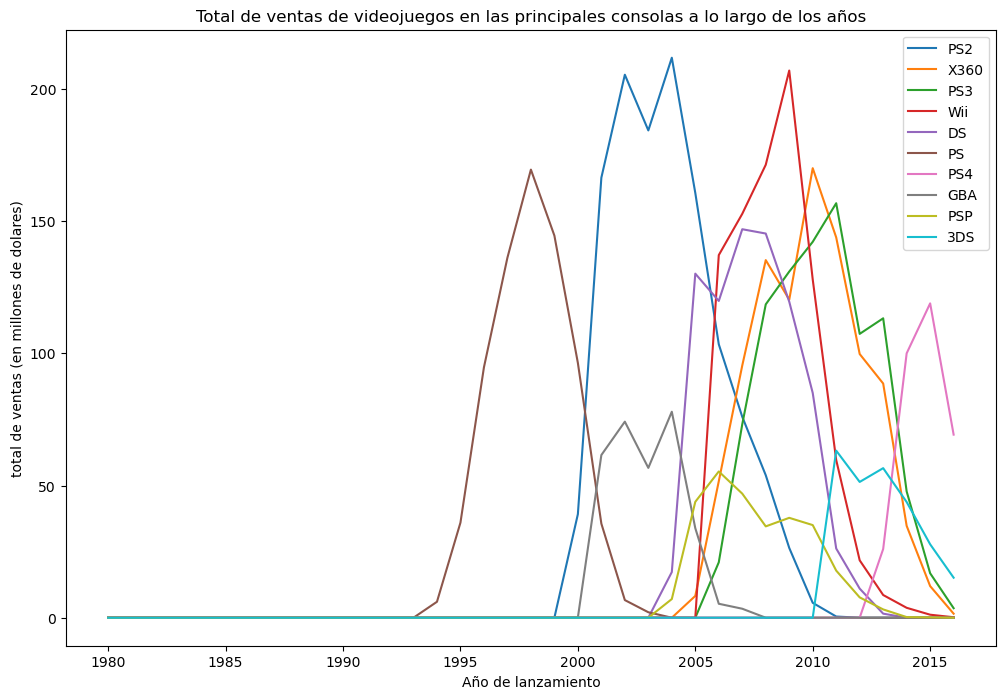

In [29]:
# Ajustar los nombres de las columnas para facilitar el acceso
data_pivot.columns = ['platform', 'year_of_release', 'total_sales']
# las 10 mejores
top_ten=data_pivot.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

#Graficamos 
plt.figure(figsize=(12, 8)) 
# creamos los ejes
ax = plt.gca()
for platform in top_ten.index:
    data_plot = data_pivot[data_pivot['platform'] == platform]
    # mantenemos los ejes para cada grafica 
    data_plot.plot(x='year_of_release', y='total_sales', kind='line', ax=ax, label=platform)

plt.title('Total de ventas de videojuegos en las principales consolas a lo largo de los años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('total de ventas (en millones de dolares)')
plt.legend()
plt.show()

Como vemos en la gran mayoria de consolas estas tiene casi el mismo comportamiento llega a un pico de ventas y luego caen lo cual es obvio por el paso de tiempo y la llegada de nuevas consolas. Sin embargo podemos hablar de algunos detalles interesantes: 

1 . La consola que mas millones de dolares a generado es la 'ps2' esto problamente era de esperar despues del enorme exito que tuvo la 'PS' (play station) ya que cuenta con uno de los picos más altos a pesar de ser de años 90.

1 . Los primeros lugares ocupados por 'PS2' y 'Wii' vemos que han sido los lideres en ventas de videjuegos ambos en diferentes periodos de tiempo. Observamos como la caida de ventas de videjuegos para 'PS2'puede deberse a la aparicion de la consola 'Wii' ya que esta tiene una subida en picada por el coontrario de la 'PS2' que fue en caida en el mismo periodo de tiempo. 

2.- ¡Interesante! Indagando un poco podemos notar que las consolas portatiles son las que cuentan con los picos mas bajos en ventas de videojuegos, siendo el más alto el de la consola portatil 'DS' que hace referencia a la Nintendo DS uno de las consolas portatiles más queridas, por debajo tenemos a 'PSP' de Sony, 'GBA'(Gameboy advance). 

###  ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?


En nuestro dataframe 'data_pivot' tenemos el nombre de cada plataforma y la cantidad de millones de dolares que hizo cada año con los juegos hechos para esta plataforma. Como bien sabemos estas presentan ciertos periodos de tiempo en donde alcanzan un maximo o un pico de ventas y luego viene una caida, esto por el paso del tiempo y la aparicion de nuevas consolas. Analizaremos que tanto demora una consola en 'desaparecer' es decir cuando deja de generar ventas de videojuegos para estas consolas. Tomemos en consideracion que 'total_sales' será 0 en caso ya no existan ventas para esas plataformas es decir su 'desaparicion' de esta. 

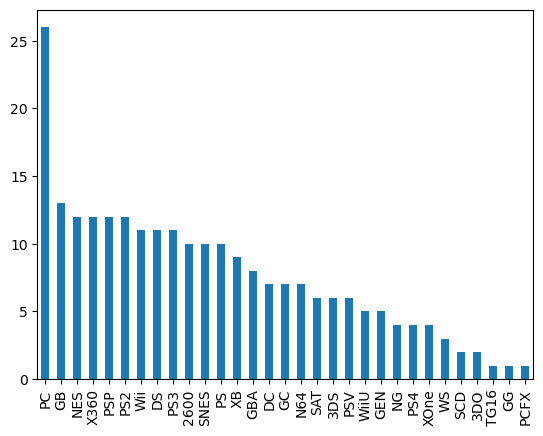

In [30]:
#eliminaremos las filas que contengan total_sales '0' 
df_filtered=data_pivot[data_pivot['total_sales']!=0]
#contaremos cuantas veces se repite la 'platform' para asi saber cuantos años tardo en desaparecer
lifetime_of_a_console=df_filtered['platform'].value_counts()
#Graficaremos 
lifetime_of_a_console.plot(kind='bar')
plt.show()

Podemos ver que consolas han perdurado durante mas tiempo, lo ideal seria ver que tanto duraban las consolas de antes con las actuales respecto a la ventas de videojuegos, asi que iremos a por ello. 

In [31]:
# Reseteamos el index para manejarlo mejor 
lifetime_of_a_console=lifetime_of_a_console.reset_index()
# Columnas mas descriptivas 
lifetime_of_a_console.columns=['platform','años_de_vida']
#Agrupamos por plataforma y nos quedamos 'year_of_release' minimo considerando como año de aparicion de la consola
df_orden=df_filtered.groupby('platform')['year_of_release'].min().sort_values().reset_index()
#Combinamos amobs data frame por 'platform' 
df_merge=df_orden.merge(lifetime_of_a_console,how='left',on='platform')
print(df_merge.head(8))

  platform  year_of_release  años_de_vida
0     2600             1980            10
1      NES             1983            12
2       DS             1985            11
3       PC             1985            26
4       GB             1988            13
5     SNES             1990            10
6      GEN             1990             5
7       GG             1992             1


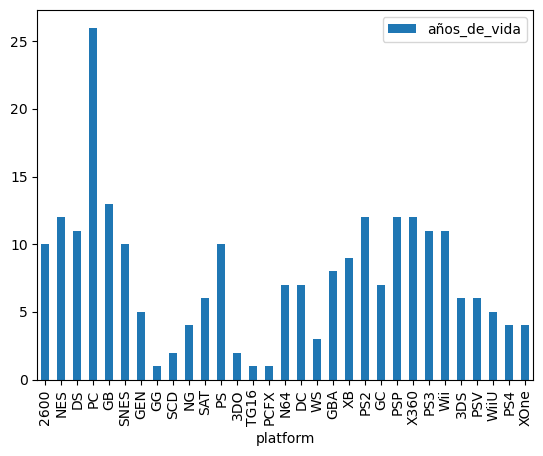

In [32]:
df_merge.plot(x='platform',y='años_de_vida',kind='bar')
plt.show()

In [36]:
print('media de años de vida: ',df_merge['años_de_vida'].mean())
print('mediana: ', df_merge['años_de_vida'].median())

media de años de vida:  7.67741935483871
mediana 7.0


Como vemos las consolas han sido ordenadas conforme han ido apareciendo desde las más antiguas hasta las mas actuales como 'PS4' o 'XOne'. La gran mayoria de consolas tiene un tiempo estimado de vida de 7 años. A excepcion de las 'PC' que como sabemos no son consolas como tal y problamente nunca desaparezcan ya que no solo tienen uso de entretenimiento como lo son los videojuegos. Vemos un decaimiento el tiempo de vida para las ultimas consolas, lo que nos pueda decir algo de la constante salida de nuevas consolas y por tanto menos tiempo de vida a comparacion de las consolas mas antiguas.   